<a href="https://colab.research.google.com/github/soyeunju/ESAA/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YB 2조 미니프로젝트3**



# **1. 라이브러리 및 데이터**

In [2]:
# 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,903 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and dire

In [3]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'DejaVu Sans'

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/ESAA YB 2조/미니프로젝트3/data/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA YB 2조/미니프로젝트3/data/movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/ESAA YB 2조/미니프로젝트3/data/submission.csv')

In [6]:
# train data
print('train info\n')
train.info()

train info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [10]:
print('train data\n')
train.head()

train data



,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [11]:
# test data
print('test info\n')
test.info()

test info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [12]:
print('test data\n')
test.head()

test data



,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


# **2. 데이터 전처리**

##**title, distributor, genre**

#### distributor

In [13]:
# 'distributor' 칼럼의 데이터 종류 파악
train['distributor'].unique()

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

train['distributor'] 데이터의 문제점

1. 공백 문제로 인해 같은 배급사가 다른 배급사로 취급 -> 문자간 공백 제거 필요
- 'CGV 아트하우스', 'CGV아트하우스'
- '와이드 릴리즈(주)', '와이드릴리즈(주)'
- '(주)마인스 엔터테인먼트', '(주)마인스엔터테인먼트'
- '시네마 달', '시네마달'

2. 맞춤법 틀린 경우 -> 교정
- '리틀빅픽처스', '리틀빅픽쳐스'

3. 이름 일부를 누락한 경우 -> 수동으로 해결
- 'CGV 무비꼴라쥬','무비꼴라쥬'

4. 같은 배급사임에도 불구하고 '(주)' 를 이름에 붙이지 않아 다른 배급사로 취급 -> 수동으로 해결
- '(주)마운틴픽쳐스', '마운틴 픽처스'
- '(주)NEW', 'NEW'
- '(주)리틀빅픽처스', '리틀빅픽처스'
- '(주)드림팩트엔터테인먼트','드림팩트 엔터테인먼트'
- '(주)에이원 엔터테인먼트','에이원 엔터테인먼트'

5. 두 가지 이상 제작사가 있는 경우 -> 두 가지 제작사를 하나의 제작사로 간주
- '더픽쳐스/(주)마운틴픽쳐스'
- '쇼박스(주)미디어플렉스'

In [14]:
## 1. 공백 문제 해결

# 1. 영어와 한글 간 공백 제거 (한글-영어 간, 영어-한글 간 모두 처리)
train['distributor'] = train['distributor'].str.replace(r'([a-zA-Z])\s+([가-힣])', r'\1\2', regex=True)  # 영어-한글 간 공백 제거
train['distributor'] = train['distributor'].str.replace(r'([가-힣])\s+([a-zA-Z])', r'\1\2', regex=True)  # 한글-영어 간 공백 제거

# 2. 그 외 모든 공백 제거 (한글과 한글 사이 등)
train['distributor'] = train['distributor'].str.replace(r'\s+', '', regex=True)

# 3. "(주)"가 뒤에 있거나 중간에 있는 경우 이를 모두 앞쪽으로 이동 (특수 문자 포함)
train['distributor'] = train['distributor'].str.replace(r'(.+)\(주\)', r'(주)\1', regex=True)

# 4. 특수 문자 '\x01' 제거
train['distributor'] = train['distributor'].str.replace(r'\x01', '', regex=True)

# 5. 최종 공백 정리
train['distributor'] = train['distributor'].str.strip()

print(train['distributor'].unique())

['롯데엔터테인먼트' '(주)쇼박스' '(주)NEW' '(주)쇼박스미디어플렉스' '백두대간' '유니버설픽쳐스인터내셔널코리아'
 '(주)두타연' '(주)케이알씨지' '(주)콘텐츠윙' '(주)키노아이' '(주)팝파트너스' 'CJE&M영화부문'
 '(주)영화제작전원사' 'CJE&MPictures' 'CGV무비꼴라쥬' '리틀빅픽처스' '스폰지' 'CJ엔터테인먼트'
 'CGV아트하우스' '조이앤시네마' '인디플러그' '콘텐츠판다' '인디스토리' '(주)팝엔터테인먼트' '시네마서비스' '웃기씨네'
 '영화사진진' '(주)레인보우팩토리' '김기덕필름' 'NEW' 'CJCGV' '동국대학교충무로영상제작센터' 'BoXoo엔터테인먼트'
 '(주)마운틴픽쳐스' '(주)메가박스플러스엠' '골든타이드픽처스' '파이오니아21' '디씨드' '드림팩트엔터테인먼트' '시너지'
 '디마엔터테인먼트' '판다미디어' '(주)스톰픽쳐스코리아' '(주)예지림엔터테인먼트' '(주)영화사조제' '보람엔터테인먼트'
 '(주)시네마달' '노바엔터테인먼트' '(주)패스파인더씨앤씨' '(주)대명문화공장' '(주)온비즈넷' 'KT&G상상마당'
 '무비꼴라쥬' '인벤트디' '(주)씨네그루키다리이엔티' '스튜디오후크' '시네마달' '(주)나이너스엔터테인먼트' 'THE픽쳐스'
 '영구아트무비' '리틀빅픽쳐스' '어뮤즈' '이모션픽처스' '(주)이스트스카이필름' '필라멘트픽쳐스' '조이앤컨텐츠그룹'
 '타임스토리그룹' '마운틴픽처스' '(주)휘엔터테인먼트' '(주)이십세기폭스코리아' '(주)피터팬픽쳐스' '에스와이코마드'
 '(주)더픽쳐스' '오퍼스픽쳐스' '(주)고앤고필름' '사람과사람들' '(주)JK필름' '(주)씨너스엔터테인먼트' 'KT'
 '싸이더스FNH' '(주)프레인글로벌' '나우콘텐츠' '홀리가든' '(주)브릿지웍스' '(주)엣나인필름' '위더스필름'
 '(주)에이원엔터테인먼트' 'OAL(올)' '싸이더스' '전망좋은영화사' '스토리셋' '이상우필름' '씨네굿필름' '영희야놀자'
 '찬란' '어썸피플' '

In [15]:
## 2.맞춤법 교정 : '리틀빅픽처스', '리틀빅픽쳐스'
train['distributor'] = train['distributor'].replace({r'리틀빅픽쳐스': '리틀빅픽처스'}, regex=True)

In [16]:
## 3. 누락한 이름 수정 : 'CGV 무비꼴라쥬','무비꼴라쥬'
train['distributor'] = train['distributor'].replace({r'^무비꼴라쥬$': 'CGV무비꼴라쥬'}, regex=True)

In [17]:
## 4. 이름 통일
# 수동으로 매핑 테이블 생성 (딕셔너리 사용)
distributor_mapping = {
    '마운틴픽처스': '(주)마운틴픽쳐스',
    'NEW': '(주)NEW',
    '리틀빅픽처스': '(주)리틀빅픽처스',
    '드림팩트엔터테인먼트': '(주)드림팩트엔터테인먼트',
    '에이원엔터테인먼트': '(주)에이원 엔터테인먼트'
    }

# 배급사 컬럼에 매핑 적용
train['distributor'] = train['distributor'].replace(distributor_mapping)

# 결과 확인
print(train['distributor'].unique())

['롯데엔터테인먼트' '(주)쇼박스' '(주)NEW' '(주)쇼박스미디어플렉스' '백두대간' '유니버설픽쳐스인터내셔널코리아'
 '(주)두타연' '(주)케이알씨지' '(주)콘텐츠윙' '(주)키노아이' '(주)팝파트너스' 'CJE&M영화부문'
 '(주)영화제작전원사' 'CJE&MPictures' 'CGV무비꼴라쥬' '(주)리틀빅픽처스' '스폰지' 'CJ엔터테인먼트'
 'CGV아트하우스' '조이앤시네마' '인디플러그' '콘텐츠판다' '인디스토리' '(주)팝엔터테인먼트' '시네마서비스' '웃기씨네'
 '영화사진진' '(주)레인보우팩토리' '김기덕필름' 'CJCGV' '동국대학교충무로영상제작센터' 'BoXoo엔터테인먼트'
 '(주)마운틴픽쳐스' '(주)메가박스플러스엠' '골든타이드픽처스' '파이오니아21' '디씨드' '(주)드림팩트엔터테인먼트'
 '시너지' '디마엔터테인먼트' '판다미디어' '(주)스톰픽쳐스코리아' '(주)예지림엔터테인먼트' '(주)영화사조제'
 '보람엔터테인먼트' '(주)시네마달' '노바엔터테인먼트' '(주)패스파인더씨앤씨' '(주)대명문화공장' '(주)온비즈넷'
 'KT&G상상마당' '인벤트디' '(주)씨네그루키다리이엔티' '스튜디오후크' '시네마달' '(주)나이너스엔터테인먼트'
 'THE픽쳐스' '영구아트무비' '어뮤즈' '이모션픽처스' '(주)이스트스카이필름' '필라멘트픽쳐스' '조이앤컨텐츠그룹'
 '타임스토리그룹' '(주)휘엔터테인먼트' '(주)이십세기폭스코리아' '(주)피터팬픽쳐스' '에스와이코마드' '(주)더픽쳐스'
 '오퍼스픽쳐스' '(주)고앤고필름' '사람과사람들' '(주)JK필름' '(주)씨너스엔터테인먼트' 'KT' '싸이더스FNH'
 '(주)프레인글로벌' '나우콘텐츠' '홀리가든' '(주)브릿지웍스' '(주)엣나인필름' '위더스필름' '(주)에이원엔터테인먼트'
 'OAL(올)' '싸이더스' '전망좋은영화사' '스토리셋' '이상우필름' '씨네굿필름' '영희야놀자' '찬란' '어썸피플'
 '아방가르드필름' '스크린조이' '(주)와이드릴리

test 자료도 똑같은 과정 진행

In [18]:
# 'distributor' 칼럼의 데이터 종류 파악
test['distributor'].unique()

array(['시네마서비스', '(주)쇼박스', 'CJ 엔터테인먼트', '모쿠슈라', '시네마 달', '(주)루믹스미디어',
       '마운틴픽쳐스', '롯데쇼핑(주)롯데엔터테인먼트', '싸이더스', '시너지', '노근리 프로덕션',
       'KT&G 상상마당', '롯데엔터테인먼트', '(주)키노아이', '쇼박스(주)미디어플렉스', '리얼라이즈픽쳐스',
       '(주)마운틴픽쳐스', '스폰지이엔티', '위드시네마', '청년필름', 'NEW', '인디스토리', '리아코어콘텐츠',
       '스토리셋', '(주) 영화사조제', '씨네굿필름', '영화사 진진', '어뮤즈', '핑크로봇 필름',
       'Cinema SAM', '필라멘트 픽쳐스', '갑종필름', '필마픽쳐스', '크리에이티브컴즈(주)',
       'CJ E&M Pictures', '오픈유컬쳐', '(주)NEW', '웃기씨네', '(주)드림웨스트픽쳐스',
       '골든타이드픽처스', '(주) 액티버스엔터테인먼트', '씨너스엔터테인먼트(주)', 'SBS콘텐츠허브',
       '타임스토리그룹', '(주)팝엔터테인먼트', '시네마달', '미로비젼', '나이너스엔터테인먼트(주)', '명필름',
       '(주)두타연', '(주) 영화제작전원사', '무비꼴라쥬', '인벤트 디', '프리비젼', '(주)미디어데이',
       '굿픽처스', '레몬트리', '타임스토리', '노바엔터테인먼트', '인디플러그', '(주)영화사 빅',
       '유나이티드 픽처스', '(유)영화사 화수분', 'BoXoo 엔터테인먼트', '늘푸른시네마', '(주)디씨드',
       '(주) 케이알씨지', '(주)노버스엔터테인먼트', '드림로드', '씨네그루(주)키다리이엔티', '(주)루스이소니도스',
       '에이원 엔터테인먼트', '애니메이션 배급', '(주)마인스 엔터테인먼트', '이십세기폭스코리아(주)', '트리필름',
       'CGV아트하우스', '와우픽쳐스', '하준사'

In [19]:
## 1. 공백 문제 해결

# 1. 영어와 한글 간 공백 제거 (한글-영어 간, 영어-한글 간 모두 처리)
test['distributor'] = test['distributor'].str.replace(r'([a-zA-Z])\s+([가-힣])', r'\1\2', regex=True)  # 영어-한글 간 공백 제거
test['distributor'] = test['distributor'].str.replace(r'([가-힣])\s+([a-zA-Z])', r'\1\2', regex=True)  # 한글-영어 간 공백 제거

# 2. 그 외 모든 공백 제거 (한글과 한글 사이 등)
test['distributor'] = test['distributor'].str.replace(r'\s+', '', regex=True)

# 3. "(주)"가 뒤에 있거나 중간에 있는 경우 이를 모두 앞쪽으로 이동 (특수 문자 포함)
test['distributor'] = test['distributor'].str.replace(r'(.+)\(주\)', r'(주)\1', regex=True)

# 4. 특수 문자 '\x01' 제거
test['distributor'] = test['distributor'].str.replace(r'\x01', '', regex=True)

# 5. 최종 공백 정리
test['distributor'] = test['distributor'].str.strip()

print(test['distributor'].unique())

['시네마서비스' '(주)쇼박스' 'CJ엔터테인먼트' '모쿠슈라' '시네마달' '(주)루믹스미디어' '마운틴픽쳐스'
 '(주)롯데쇼핑롯데엔터테인먼트' '싸이더스' '시너지' '노근리프로덕션' 'KT&G상상마당' '롯데엔터테인먼트' '(주)키노아이'
 '(주)쇼박스미디어플렉스' '리얼라이즈픽쳐스' '(주)마운틴픽쳐스' '스폰지이엔티' '위드시네마' '청년필름' 'NEW'
 '인디스토리' '리아코어콘텐츠' '스토리셋' '(주)영화사조제' '씨네굿필름' '영화사진진' '어뮤즈' '핑크로봇필름'
 'CinemaSAM' '필라멘트픽쳐스' '갑종필름' '필마픽쳐스' '(주)크리에이티브컴즈' 'CJE&MPictures'
 '오픈유컬쳐' '(주)NEW' '웃기씨네' '(주)드림웨스트픽쳐스' '골든타이드픽처스' '(주)액티버스엔터테인먼트'
 '(주)씨너스엔터테인먼트' 'SBS콘텐츠허브' '타임스토리그룹' '(주)팝엔터테인먼트' '미로비젼' '(주)나이너스엔터테인먼트'
 '명필름' '(주)두타연' '(주)영화제작전원사' '무비꼴라쥬' '인벤트디' '프리비젼' '(주)미디어데이' '굿픽처스'
 '레몬트리' '타임스토리' '노바엔터테인먼트' '인디플러그' '(주)영화사빅' '유나이티드픽처스' '(유)영화사화수분'
 'BoXoo엔터테인먼트' '늘푸른시네마' '(주)디씨드' '(주)케이알씨지' '(주)노버스엔터테인먼트' '드림로드'
 '(주)씨네그루키다리이엔티' '(주)루스이소니도스' '에이원엔터테인먼트' '애니메이션배급' '(주)마인스엔터테인먼트'
 '(주)이십세기폭스코리아' '트리필름' 'CGV아트하우스' '와우픽쳐스' '하준사' '오퍼스픽쳐스' '(주)메가박스중앙플러스엠'
 '리틀빅픽처스' '(주)에이원엔터테인먼트' '미디어로그' '(주)메가박스플러스엠' '(주)엣나인필름' '(주)예지림엔터테인먼트'
 '비에이치제이시네마' '(주)스톰픽쳐스코리아' '(주)다세포클럽' '디씨드' '(주)컨텐츠온미디어' '(주)씨타마운틴픽쳐스']


In [20]:
## 2. 누락한 이름 수정 : 'CGV 무비꼴라쥬','무비꼴라쥬'
test['distributor'] = test['distributor'].replace({r'^무비꼴라쥬$': 'CGV무비꼴라쥬'}, regex=True)

In [21]:
## 3. 이름 통일
# 수동으로 매핑 테이블 생성 (딕셔너리 사용)
distributor_mapping = {
    '마운틴픽처스': '(주)마운틴픽쳐스',
    'NEW': '(주)NEW',
    '리틀빅픽처스': '(주)리틀빅픽처스',
    '에이원엔터테인먼트': '(주)에이원엔터테인먼트',
    '(주)디씨드': '디씨드'
    }

# 배급사 컬럼에 매핑 적용
test['distributor'] = test['distributor'].replace(distributor_mapping)

# 결과 확인
print(test['distributor'].unique())

['시네마서비스' '(주)쇼박스' 'CJ엔터테인먼트' '모쿠슈라' '시네마달' '(주)루믹스미디어' '마운틴픽쳐스'
 '(주)롯데쇼핑롯데엔터테인먼트' '싸이더스' '시너지' '노근리프로덕션' 'KT&G상상마당' '롯데엔터테인먼트' '(주)키노아이'
 '(주)쇼박스미디어플렉스' '리얼라이즈픽쳐스' '(주)마운틴픽쳐스' '스폰지이엔티' '위드시네마' '청년필름' '(주)NEW'
 '인디스토리' '리아코어콘텐츠' '스토리셋' '(주)영화사조제' '씨네굿필름' '영화사진진' '어뮤즈' '핑크로봇필름'
 'CinemaSAM' '필라멘트픽쳐스' '갑종필름' '필마픽쳐스' '(주)크리에이티브컴즈' 'CJE&MPictures'
 '오픈유컬쳐' '웃기씨네' '(주)드림웨스트픽쳐스' '골든타이드픽처스' '(주)액티버스엔터테인먼트' '(주)씨너스엔터테인먼트'
 'SBS콘텐츠허브' '타임스토리그룹' '(주)팝엔터테인먼트' '미로비젼' '(주)나이너스엔터테인먼트' '명필름' '(주)두타연'
 '(주)영화제작전원사' 'CGV무비꼴라쥬' '인벤트디' '프리비젼' '(주)미디어데이' '굿픽처스' '레몬트리' '타임스토리'
 '노바엔터테인먼트' '인디플러그' '(주)영화사빅' '유나이티드픽처스' '(유)영화사화수분' 'BoXoo엔터테인먼트'
 '늘푸른시네마' '디씨드' '(주)케이알씨지' '(주)노버스엔터테인먼트' '드림로드' '(주)씨네그루키다리이엔티'
 '(주)루스이소니도스' '(주)에이원엔터테인먼트' '애니메이션배급' '(주)마인스엔터테인먼트' '(주)이십세기폭스코리아'
 '트리필름' 'CGV아트하우스' '와우픽쳐스' '하준사' '오퍼스픽쳐스' '(주)메가박스중앙플러스엠' '(주)리틀빅픽처스'
 '미디어로그' '(주)메가박스플러스엠' '(주)엣나인필름' '(주)예지림엔터테인먼트' '비에이치제이시네마' '(주)스톰픽쳐스코리아'
 '(주)다세포클럽' '(주)컨텐츠온미디어' '(주)씨타마운틴픽쳐스']


distributor 상위 4개까지 + others로 나눠서 원핫 인코딩

col_name: distributor_"배급사"

In [22]:
# 'distributor' 열에서 각 값의 개수 세기
distributor_counts = train['distributor'].value_counts()

# 상위 4개 distributor 추출
top_4_distributors = distributor_counts.index[:4]

print(top_4_distributors)

# 상위 4개에 해당하지 않는 distributor를 'others'로 처리
train['distributor'] = train['distributor'].apply(
    lambda x: x if x in top_4_distributors else 'others'
)
test['distributor'] = test['distributor'].apply(
    lambda x: x if x in top_4_distributors else 'others'
)

# 'distributor' 열에 대해 원핫 인코딩을 진행
train = pd.get_dummies(train, columns=['distributor'], drop_first=False)
train = train.astype({col: 'int' for col in train.columns if col.startswith('distributor')})
test = pd.get_dummies(test, columns=['distributor'], drop_first=False)
test = test.astype({col: 'int' for col in test.columns if col.startswith('distributor')})

Index(['CJ엔터테인먼트', '롯데엔터테인먼트', '(주)NEW', '(주)마운틴픽쳐스'], dtype='object', name='distributor')


장르의 경우에는 test / train의 인코딩이 똑같을 수 있도록 만듦

배급사의 경우엔 겹치는 데이터는 같을 수 있도록 만듦.

#### Genre

colname: genre_"장르이름"

In [23]:
# train 원핫인코딩
train = pd.get_dummies(train, columns=['genre'], drop_first=False)
train.loc[:, train.columns.str.startswith('genre')] = train.loc[:, train.columns.str.startswith('genre')].astype(int)
# test 원핫인코딩
test = pd.get_dummies(test, columns=['genre'], drop_first=False)
test.loc[:, test.columns.str.startswith('genre')] = test.loc[:, test.columns.str.startswith('genre')].astype(int)

In [24]:
# 중간 결과 확인
train.head(3)

,title,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,...,genre_느와르,genre_다큐멘터리,genre_드라마,genre_멜로/로맨스,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디
0,개들의 전쟁,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,...,0,0,0,0,0,0,0,0,1,0
1,내부자들,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,...,1,0,0,0,0,0,0,0,0,0
2,은밀하게 위대하게,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,...,0,0,0,0,0,0,0,0,1,0


In [25]:
# 중간 결과 확인
test.head(3)

,title,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,distributor_(주)NEW,...,genre_느와르,genre_다큐멘터리,genre_드라마,genre_멜로/로맨스,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디
0,용서는 없다,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3,0,...,1,0,0,0,0,0,0,0,0,0
1,아빠가 여자를 좋아해,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3,0,...,0,0,0,1,0,0,0,0,0,0
2,하모니,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7,0,...,0,0,1,0,0,0,0,0,0,0


## **release_time, time, screening_rate**

### release_time

- datetime 오브젝트로 변환
- 분기 변수 추가 "release_quarter"
- 분기 변수 원-핫 인코딩 "release_quarter_1"~"release_quarter_4"

In [26]:
from datetime import datetime
import os

train['release_time']=pd.to_datetime(train['release_time'])
test['release_time']=pd.to_datetime(test['release_time'])

train['release_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 600 entries, 0 to 599
Series name: release_time
Non-Null Count  Dtype         
--------------  -----         
600 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.8 KB


In [27]:
test['release_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 243 entries, 0 to 242
Series name: release_time
Non-Null Count  Dtype         
--------------  -----         
243 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.0 KB


In [28]:
train['release_time'].head(3)

,release_time
0,2012-11-22
1,2015-11-19
2,2013-06-05


In [29]:
# 분기 변수 추가
def calculate_quarter(month):
    if 1 <= month <= 3:
        return 1  # 1분기
    elif 4 <= month <= 6:
        return 2  # 2분기
    elif 7 <= month <= 9:
        return 3  # 3분기
    else:
        return 4  # 4분기

train['release_quarter'] = train['release_time'].dt.month.apply(calculate_quarter)
test['release_quarter'] = test['release_time'].dt.month.apply(calculate_quarter)

train['release_quarter'].head()

,release_quarter
0,4
1,4
2,2
3,3
4,4


In [30]:
release_quarter_encoded_train = pd.get_dummies(train['release_quarter'], prefix='release_quarter').astype(int)
release_quarter_encoded_test = pd.get_dummies(test['release_quarter'], prefix='release_quarter').astype(int)

train = pd.concat([train, release_quarter_encoded_train], axis=1)
test = pd.concat([test, release_quarter_encoded_test], axis=1)

train.head(3)

,title,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,...,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,release_quarter,release_quarter_1,release_quarter_2,release_quarter_3,release_quarter_4
0,개들의 전쟁,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,...,0,0,0,1,0,4,0,0,0,1
1,내부자들,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,...,0,0,0,0,0,4,0,0,0,1
2,은밀하게 위대하게,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,...,0,0,0,1,0,2,0,1,0,0


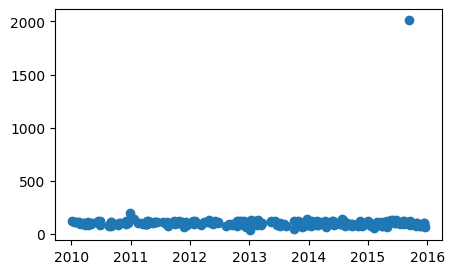

In [31]:
#release_time 산점도
plt.figure(figsize=(5, 3))
plt.scatter(test['release_time'], test['time'])
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

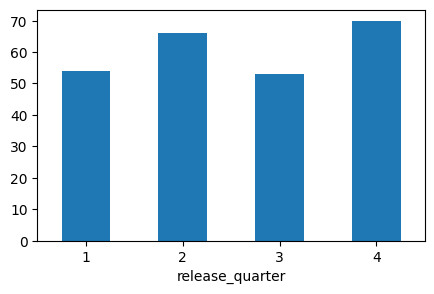

In [32]:
#분기별 count 확인
plt.figure(figsize=(5, 3))
quarter_counts = test.groupby('release_quarter')['title'].count()
quarter_counts.plot(kind='bar')
plt.xticks(rotation=0)

### screening rate

- screening_rat 원-핫 인코딩 "screening_(상영등급)"

In [33]:
# 원-핫 인코딩
screening_encoded_train = pd.get_dummies(train['screening_rat'], prefix='screening').astype(int)
screening_encoded_test = pd.get_dummies(test['screening_rat'], prefix='screening').astype(int)

train = pd.concat([train, screening_encoded_train], axis=1)
test = pd.concat([test, screening_encoded_test], axis=1)

train.head(3)

,title,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,...,genre_코미디,release_quarter,release_quarter_1,release_quarter_2,release_quarter_3,release_quarter_4,screening_12세 관람가,screening_15세 관람가,screening_전체 관람가,screening_청소년 관람불가
0,개들의 전쟁,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,...,0,4,0,0,0,1,0,0,0,1
1,내부자들,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,...,0,4,0,0,0,1,0,0,0,1
2,은밀하게 위대하게,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,...,0,2,0,1,0,0,0,1,0,0


In [34]:
test.head(3)

,title,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,distributor_(주)NEW,...,genre_코미디,release_quarter,release_quarter_1,release_quarter_2,release_quarter_3,release_quarter_4,screening_12세 관람가,screening_15세 관람가,screening_전체 관람가,screening_청소년 관람불가
0,용서는 없다,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3,0,...,0,1,1,0,0,0,0,0,0,1
1,아빠가 여자를 좋아해,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3,0,...,0,1,1,0,0,0,1,0,0,0
2,하모니,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7,0,...,0,1,1,0,0,0,1,0,0,0


### time

- test 데이터의 time 이상치 수정 (2000 -> 63)
- 로그 변환 "time"

In [35]:
train['time'].head(3)

,time
0,96
1,130
2,123


In [36]:
test['time'].head(3)

,time
0,125
1,113
2,115


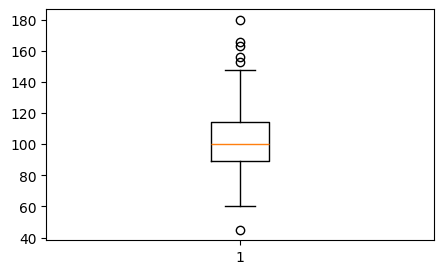

In [37]:
plt.figure(figsize=(5, 3))
plt.boxplot(train['time'])
plt.show()

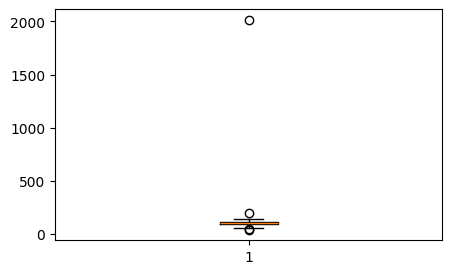

In [38]:
plt.figure(figsize=(5, 3))
plt.boxplot(test['time'])
plt.show()

In [39]:
outliers = test[test['time'] > 1500]
outliers

,title,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,distributor_(주)NEW,...,genre_코미디,release_quarter,release_quarter_1,release_quarter_2,release_quarter_3,release_quarter_4,screening_12세 관람가,screening_15세 관람가,screening_전체 관람가,screening_청소년 관람불가
224,슈퍼레이서 엔지,2015-09-10,2015,전체 관람가,허선,NaN,0,4,5,0,...,0,3,0,0,1,0,0,0,1,0


In [40]:
# "슈퍼레이서 엔지" 상영시간은 63분으로 확인됨
test.loc[test['title'] == "슈퍼레이서 엔지", 'time'] = 63

test[test['title'] == "슈퍼레이서 엔지"]

,title,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,distributor_(주)NEW,...,genre_코미디,release_quarter,release_quarter_1,release_quarter_2,release_quarter_3,release_quarter_4,screening_12세 관람가,screening_15세 관람가,screening_전체 관람가,screening_청소년 관람불가
224,슈퍼레이서 엔지,2015-09-10,63,전체 관람가,허선,NaN,0,4,5,0,...,0,3,0,0,1,0,0,0,1,0


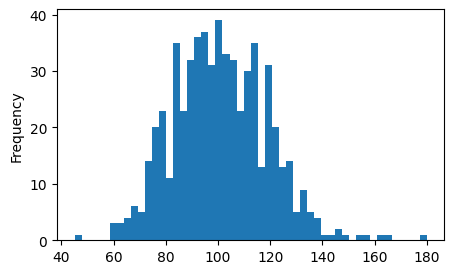

In [41]:
# 히스토그램
plt.figure(figsize=(5, 3))
train['time'].plot(kind='hist', bins=50)
plt.show()

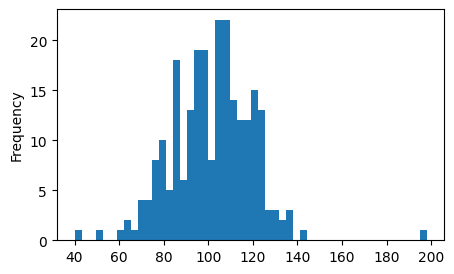

In [42]:
plt.figure(figsize=(5, 3))
test['time'].plot(kind='hist', bins=50)
plt.show()

In [43]:
# 로그 변환
train['time'] = np.log(train['time'])
test['time'] = np.log(test['time'])

train.head(3)

,title,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,...,genre_코미디,release_quarter,release_quarter_1,release_quarter_2,release_quarter_3,release_quarter_4,screening_12세 관람가,screening_15세 관람가,screening_전체 관람가,screening_청소년 관람불가
0,개들의 전쟁,2012-11-22,4.564348,청소년 관람불가,조병옥,NaN,0,91,2,23398,...,0,4,0,0,0,1,0,0,0,1
1,내부자들,2015-11-19,4.867534,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,...,0,4,0,0,0,1,0,0,0,1
2,은밀하게 위대하게,2013-06-05,4.812184,15세 관람가,장철수,220775.25,4,343,4,6959083,...,0,2,0,1,0,0,0,1,0,0


In [44]:
test.head(3)

,title,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,distributor_(주)NEW,...,genre_코미디,release_quarter,release_quarter_1,release_quarter_2,release_quarter_3,release_quarter_4,screening_12세 관람가,screening_15세 관람가,screening_전체 관람가,screening_청소년 관람불가
0,용서는 없다,2010-01-07,4.828314,청소년 관람불가,김형준,3.005290e+05,2,304,3,0,...,0,1,1,0,0,0,0,0,0,1
1,아빠가 여자를 좋아해,2010-01-14,4.727388,12세 관람가,이광재,3.427002e+05,4,275,3,0,...,0,1,1,0,0,0,1,0,0,0
2,하모니,2010-01-28,4.744932,12세 관람가,강대규,4.206611e+06,3,419,7,0,...,0,1,1,0,0,0,1,0,0,0


## **num_actor, num_staff, box_off_num**

### num_actor
: 결측치 없음

In [45]:
print(train['num_actor'].isnull().sum(),test['num_actor'].isnull().sum())

0 0


In [46]:
train['num_actor'].describe()

,num_actor
count,600.000000
mean,3.706667
std,2.446889
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,25.000000


In [47]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 1사분위수
    Q3 = data[column].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1                     # IQR 계산
    lower_bound = Q1 - 1.5 * IQR      # 아래 경계값
    upper_bound = Q3 + 1.5 * IQR      # 위 경계값

    # 이상치 조건
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [48]:
# Train 데이터에서 num_actor의 이상치 탐지
outliers_train = detect_outliers_iqr(train, 'num_actor')
print(f"Train 데이터의 num_actor 이상치 개수: {len(outliers_train)}")
outliers_train.head(3)

Train 데이터의 num_actor 이상치 개수: 38


,title,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,...,genre_코미디,release_quarter,release_quarter_1,release_quarter_2,release_quarter_3,release_quarter_4,screening_12세 관람가,screening_15세 관람가,screening_전체 관람가,screening_청소년 관람불가
16,써니,2011-05-04,4.820282,15세 관람가,강형철,8223342.0,1,572,11,7453715,...,1,2,0,1,0,0,0,1,0,0
19,하하하,2010-05-05,4.744932,청소년 관람불가,홍상수,NaN,0,74,9,57029,...,0,2,0,1,0,0,0,0,0,1
26,이웃집 좀비,2010-02-18,4.488636,15세 관람가,류훈,NaN,0,40,10,2807,...,0,1,1,0,0,0,0,1,0,0


In [49]:
# Test 데이터에서 num_actor의 이상치 탐지
outliers_test = detect_outliers_iqr(test, 'num_actor')
print(f"Test 데이터의 num_actor 이상치 개수: {len(outliers_test)}")
outliers_test.head(3)

Test 데이터의 num_actor 이상치 개수: 11


,title,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,distributor_(주)NEW,...,genre_코미디,release_quarter,release_quarter_1,release_quarter_2,release_quarter_3,release_quarter_4,screening_12세 관람가,screening_15세 관람가,screening_전체 관람가,screening_청소년 관람불가
12,작은 연못,2010-04-15,4.454347,15세 관람가,이상우,34.0,1,310,9,0,...,0,2,0,1,0,0,0,1,0,0
19,마법천자문: 대마왕의 부활을 막아라,2010-08-19,4.442651,전체 관람가,윤영기,NaN,0,0,10,0,...,0,3,0,0,1,0,0,0,1,0
32,브라보! 재즈 라이프,2010-12-16,4.653960,전체 관람가,남무성,NaN,0,3,11,0,...,0,4,0,0,0,1,0,0,1,0


- Train 데이터의 num_actor 이상치 개수: 38
- Test 데이터의 num_actor 이상치 개수: 11

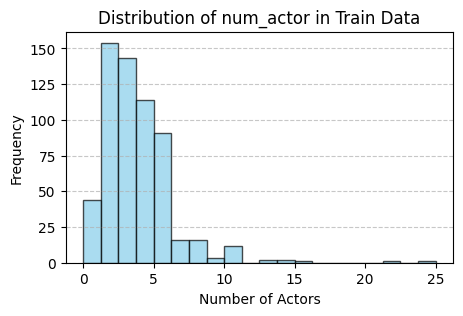

In [50]:
# Train 데이터의 num_actor 분포 시각화
plt.figure(figsize=(5, 3))
plt.hist(train['num_actor'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of num_actor in Train Data')
plt.xlabel('Number of Actors')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

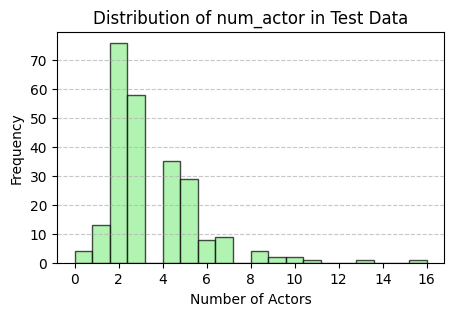

In [51]:
# Test 데이터의 num_actor 분포 시각화
plt.figure(figsize=(5, 3))
plt.hist(test['num_actor'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of num_actor in Test Data')
plt.xlabel('Number of Actors')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- train의 num_actor는 0에서 5 사이에 대부분의 데이터가 집중되어 있고, 데이터의 분포가 오른쪽 꼬리가 긴 분포를 보임
- 10 이상 (특히 15 이상)의 값들은 드물게 나타나며, 이상치일 가능성이 높음


- test의 num_actor 역시 right-skewed 분포임. (0~4 사이 집중 분포)

  => 로그변환

In [52]:
import numpy as np

# 로그 변환 적용
train['num_actor'] = np.log1p(train['num_actor'])
test['num_actor'] = np.log1p(test['num_actor'])

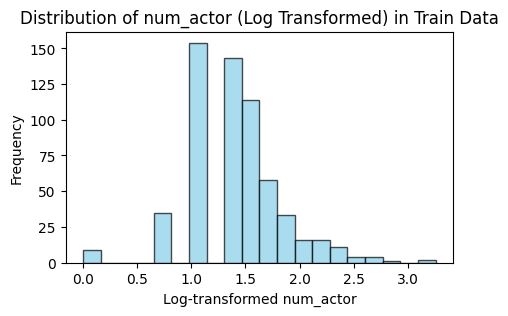

In [53]:
import matplotlib.pyplot as plt

# train 데이터 시각화
plt.figure(figsize=(5, 3))
plt.hist(train['num_actor'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of num_actor (Log Transformed) in Train Data")
plt.xlabel("Log-transformed num_actor")
plt.ylabel("Frequency")
plt.show()

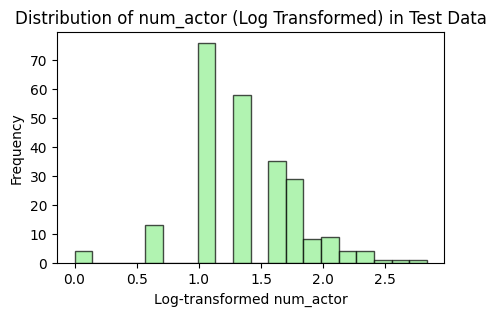

In [54]:
# test 데이터 시각화
plt.figure(figsize=(5, 3))
plt.hist(test['num_actor'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title("Distribution of num_actor (Log Transformed) in Test Data")
plt.xlabel("Log-transformed num_actor")
plt.ylabel("Frequency")
plt.show()

### num_staff
: 결측치 없음

In [55]:
print(train['num_staff'].isnull().sum(),test['num_staff'].isnull().sum())

0 0


In [56]:
train['num_staff'].describe()

,num_staff
count,600.000000
mean,151.118333
std,165.654671
min,0.000000
25%,17.000000
50%,82.500000
75%,264.000000
max,869.000000


In [57]:
test['num_staff'].describe()

,num_staff
count,243.000000
mean,159.316872
std,162.976607
min,0.000000
25%,18.000000
50%,105.000000
75%,282.000000
max,776.000000


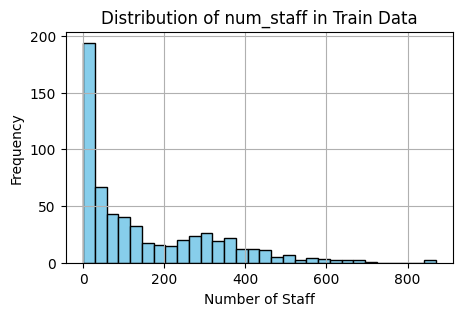

In [58]:
# Train 데이터에서 num_staff의 분포 확인
plt.figure(figsize=(5, 3))
plt.hist(train['num_staff'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of num_staff in Train Data')
plt.xlabel('Number of Staff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

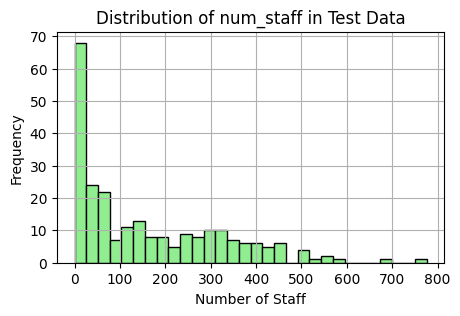

In [59]:
# Test 데이터에서 num_staff의 분포 확인
plt.figure(figsize=(5, 3))
plt.hist(test['num_staff'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of num_staff in Test Data')
plt.xlabel('Number of Staff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [60]:
# 로그 변환
train['num_staff'] = np.log1p(train['num_staff'])

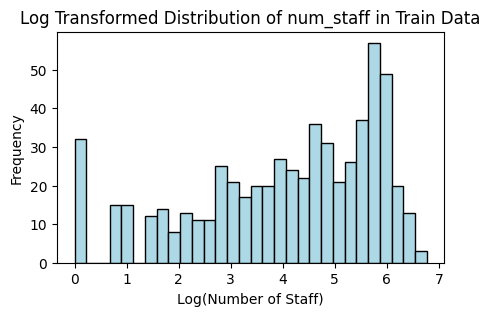

In [61]:
plt.figure(figsize=(5, 3))
plt.hist(train['num_staff'], bins=30, color='lightblue', edgecolor='black')
plt.title('Log Transformed Distribution of num_staff in Train Data')
plt.xlabel('Log(Number of Staff)')
plt.ylabel('Frequency')
plt.show()

In [62]:
test['num_staff'] = np.log1p(test['num_staff'])

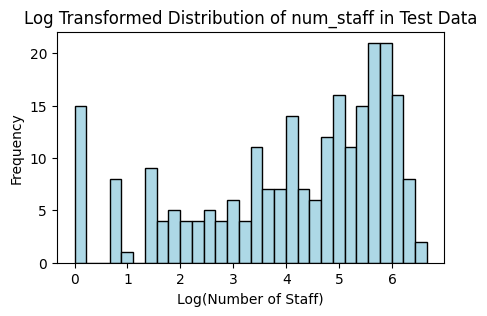

In [63]:
plt.figure(figsize=(5, 3))
plt.hist(test['num_staff'], bins=30, color='lightblue', edgecolor='black')
plt.title('Log Transformed Distribution of num_staff in Test Data')
plt.xlabel('Log(Number of Staff)')
plt.ylabel('Frequency')
plt.show()

### box_off_num : **타깃 레이블**
: 결측치 없음

In [64]:
train['box_off_num'].isnull().sum()

0

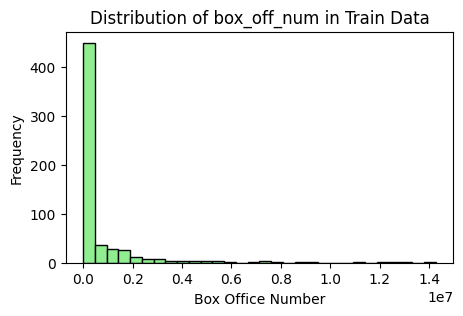

In [65]:
# box_off_num의 히스토그램
plt.figure(figsize=(5, 3))
plt.hist(train['box_off_num'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of box_off_num in Train Data')
plt.xlabel('Box Office Number')
plt.ylabel('Frequency')
plt.show()

In [66]:
# 로그 변환 적용
train['box_off_num'] = np.log1p(train['box_off_num'])

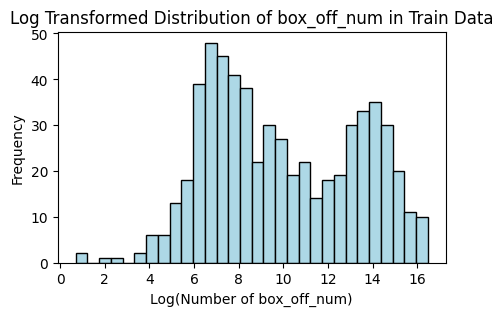

In [67]:
plt.figure(figsize=(5, 3))
plt.hist(train['box_off_num'], bins=30, color='lightblue', edgecolor='black')
plt.title('Log Transformed Distribution of box_off_num in Train Data')
plt.xlabel('Log(Number of box_off_num)')
plt.ylabel('Frequency')
plt.show()

## **dir_prev_bfnum, dir_prev_num, director**

###dir_prev_bfnum

train, test 데이터 모두 전체 데이터의 55%가 결측치 -> drop

In [68]:
# 결측치 확인
train[['director', 'dir_prev_bfnum', 'dir_prev_num']].isnull().sum() ## train['dir_prev_bfnum'] 55% 결측치 -> drop

,0
director,0
dir_prev_bfnum,330
dir_prev_num,0


In [69]:
test[['director', 'dir_prev_bfnum', 'dir_prev_num']].isnull().sum() ## test['dir_prev_bfnum'] 55% 결측치 -> drop

,0
director,0
dir_prev_bfnum,136
dir_prev_num,0


In [70]:
train.drop(['dir_prev_bfnum'], axis = 1, inplace = True)
test.drop(['dir_prev_bfnum'], axis = 1, inplace = True)

###dir_prev_num
train, test 데이터 모두 전체 데이터의 55%가 값이 0 -> 영화 관객수를 예측하는데 큰 역할을 하지 못할 것 같다. drop

In [71]:
train['dir_prev_num'].describe() ## Q2까지 값이 0인 것을 알 수 있음

,dir_prev_num
count,600.000000
mean,0.876667
std,1.183409
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,5.000000


In [72]:
test['dir_prev_num'].describe() ## Q2까지 값이 0인 것을 알 수 있음

,dir_prev_num
count,243.000000
mean,0.851852
std,1.200321
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,6.000000


In [73]:
(train['dir_prev_num'] == 0).sum() ## train['dir_prev_num'] 55%가 값이 0 -> 영화 관객수를 예측하는데 큰 역할을 하지 못할 것 같다. -> drop

330

In [74]:
(test['dir_prev_num'] == 0).sum() ## test['dir_prev_num'] 55%가 값이 0 -> 영화 관객수를 예측하는데 큰 역할을 하지 못할 것 같다. -> drop

136

In [75]:
train.drop(['dir_prev_num'], axis = 1, inplace = True)
test.drop(['dir_prev_num'], axis = 1, inplace = True)

### director
train 데이터의 경우, 78%가 distinct한 감독명-> 과적합 문제 발생할 수 있음. drop

test 데이터의 경우, 90%가 distinct한 감독명 -> 과적합 문제 발생할 수 있음. drop

In [76]:
train['director'].nunique()

472

In [77]:
test['director'].nunique()

220

In [78]:
train.drop(['director'], axis = 1, inplace = True)
test.drop(['director'], axis = 1, inplace = True)

## **피처엔지니어링**

가설 : 특정 영화의 스크린 점유율이 높을수록 영화 관객 수가 높을 것이다

출처 : [영화진흥위원회: 기간별 스크린 점유율]

* 스크린점유율 산출기준 = A(스크린수) / B(전체스크린수) * 100
  * 스크린수(A) : 조회기간에 특정영화가 1회차 이상 상영된 전체 스크린수
  * 전체스크린수(B) : ∑(조회기간에 특정영화가 1회차 이상 상영된 전체 스크린수) (※ 각 상영영화별 A값(스크린수) 누적의 합)

In [79]:
# 연도별로 정리된 엑셀파일 불러오기
df_2010 = pd.read_excel('/content/drive/MyDrive/ESAA YB 2조/미니프로젝트3/data/2010.xlsx')
df_2011 = pd.read_excel('/content/drive/MyDrive/ESAA YB 2조/미니프로젝트3/data/2011.xlsx')
df_2012 = pd.read_excel('/content/drive/MyDrive/ESAA YB 2조/미니프로젝트3/data/2012.xlsx')
df_2013 = pd.read_excel('/content/drive/MyDrive/ESAA YB 2조/미니프로젝트3/data/2013.xlsx')
df_2014 = pd.read_excel('/content/drive/MyDrive/ESAA YB 2조/미니프로젝트3/data/2014.xlsx')
df_2015 = pd.read_excel('/content/drive/MyDrive/ESAA YB 2조/미니프로젝트3/data/2015.xlsx')

# 2010~2015 데이터파일 하나로 병합하기. 필요한 피처만 선택
df = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015],axis = 0)[['영화명','개봉일','스크린수','스크린점유율']]

# train, test 데이터의 'title' 피처를 기준으로 merge할 것이기 때문에 피처명 변경
df = df.rename(columns={
    '영화명': 'title',
    '개봉일': 'release_time',
    '스크린수': 'screen_num',
    '스크린점유율': 'screen_occupancy'
})

# 데이터 확인
df.head(3)

,title,release_time,screen_num,screen_occupancy
0,아이언맨 2,2010-04-29,921,0.016
1,포화 속으로,2010-06-16,742,0.013
2,이끼,2010-07-14,740,0.013


In [80]:
print(df.shape[0], df['title'].nunique()) ## 'title' 값들이 중복되어 있음.

17258 13220


In [81]:
# 중복된 'title' 값 확인
duplicated_titles = df[df['title'].duplicated(keep = False)]
duplicated_titles[22:25] ## 임의로 선택

,title,release_time,screen_num,screen_occupancy
34,시라노; 연애조작단,2010-09-16,415,0.007
39,하모니,2010-01-28,384,0.007
40,이층의 악당,2010-11-24,379,0.007


In [82]:
df[df['title'].isin(['시라노; 연애조작단','하모니','이층의 악당'])].sort_values('title')

,title,release_time,screen_num,screen_occupancy
34,시라노; 연애조작단,2010-09-16,415,0.007
494,시라노; 연애조작단,2010-09-16,1,0.000
40,이층의 악당,2010-11-24,379,0.007
1246,이층의 악당,2010-11-24,1,0.000
39,하모니,2010-01-28,384,0.007
943,하모니,2010-01-28,1,0.000
2244,하모니,NaT,1,0.000
2163,하모니,NaT,1,0.000


- 확인해 보니 영화진흥위원회 사이트에서 데이터를 내려받을 때, 각 연도별로 데이터를 다운을 받았지만 해당 연도가 아닌 데이터들도 들어있었음

- screen_num 값을 통해, 재상영 영화일 가능성이 있다고 판단

- 최초 상영 데이터 활용 **-> 전처리 수행**

In [83]:
# 최초 상영 데이터 활용
df = df.drop_duplicates(subset = 'title', keep = 'first')

# 'release_time' 피처 삭제
df.drop('release_time',axis = 1, inplace = True)

In [84]:
# train, test 와 df 데이터 merge
train = pd.merge(train, df, on = 'title', how = 'left')
test = pd.merge(test,df,on = 'title', how = 'left')

- 일부 데이터의 경우, 띄어쓰기/특수문자 등의 이유로 같은 'title' 영화임에도 불구하고 제대로 매핑이 수행되지 않음 -> 수동으로 'title'명 수정

In [85]:
## 수정 후 여전히 1개 train 데이터에 대해서 결측지 존재
train[['screen_num','screen_occupancy']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   screen_num        599 non-null    float64
 1   screen_occupancy  599 non-null    float64
dtypes: float64(2)
memory usage: 9.5 KB


In [86]:
## 수정 후 여전히 1개 test 데이터에 대해서 결측지 존재
test[['screen_num','screen_occupancy']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   screen_num        242 non-null    float64
 1   screen_occupancy  242 non-null    float64
dtypes: float64(2)
memory usage: 3.9 KB


- 'title'명으로 수정을 해도 수정이 되지 않아, 임의로 수정

In [87]:
df[df['title']=='개를 훔치는 완벽한 방법']

,title,screen_num,screen_occupancy
166,개를 훔치는 완벽한 방법,205,0.002


In [88]:
# train 데이터 전처리
train.loc[train['screen_num'].isna(), 'screen_num'] = 205
train.loc[train['screen_occupancy'].isna(), 'screen_occupancy'] = 0.002

In [89]:
df[df['title']=='이것이 우리의 끝이다']

,title,screen_num,screen_occupancy
396,이것이 우리의 끝이다,25,0.0


In [90]:
# test 데이터 전처리
test.loc[test['screen_num'].isna(), 'screen_num'] = 25
test.loc[test['screen_occupancy'].isna(), 'screen_occupancy'] = 0.0

In [91]:
print(sum(train.isna().sum()),sum(test.isna().sum())) ## 모든 데이터 셋에 대해 결측지 없음

0 0


# **최종 결과**

In [92]:
train.drop(['title','release_time','screening_rat','release_quarter'],axis = 1, inplace = True)
test.drop(['title','release_time','screening_rat','release_quarter'],axis = 1, inplace = True)

In [93]:
train.head(10)

,time,num_staff,num_actor,box_off_num,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_CJ엔터테인먼트,distributor_others,distributor_롯데엔터테인먼트,genre_SF,...,release_quarter_1,release_quarter_2,release_quarter_3,release_quarter_4,screening_12세 관람가,screening_15세 관람가,screening_전체 관람가,screening_청소년 관람불가,screen_num,screen_occupancy
0,4.564348,4.521789,1.098612,10.060449,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,94.0,0.001
1,4.867534,5.961005,1.386294,15.771725,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1129.0,0.010
2,4.812184,5.840642,1.609438,15.755558,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1341.0,0.014
3,4.615121,3.044522,1.945910,12.291640,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1.0,0.000
4,4.682131,5.529429,1.098612,13.088575,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,338.0,0.006
5,4.727388,5.572154,1.609438,12.359703,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,366.0,0.005
6,4.644391,3.496508,1.791759,10.887941,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1.0,0.000
7,4.564348,5.837730,1.098612,13.920343,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,549.0,0.007
8,4.859812,1.386294,1.791759,8.471987,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,35.0,0.000
9,4.543295,4.934474,1.386294,6.767343,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,5.0,0.000


In [94]:
test.head(10)

,time,num_staff,num_actor,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_CJ엔터테인먼트,distributor_others,distributor_롯데엔터테인먼트,genre_SF,genre_공포,...,release_quarter_1,release_quarter_2,release_quarter_3,release_quarter_4,screening_12세 관람가,screening_15세 관람가,screening_전체 관람가,screening_청소년 관람불가,screen_num,screen_occupancy
0,4.828314,5.720312,1.386294,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,323.0,0.006
1,4.727388,5.620401,1.386294,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,277.0,0.005
2,4.744932,6.040255,2.079442,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,384.0,0.007
3,4.753590,6.013715,1.098612,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,569.0,0.010
4,4.700480,5.942799,0.693147,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,265.0,0.005
5,4.553877,5.056246,1.098612,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,11.0,0.000
6,4.644391,2.484907,1.098612,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,12.0,0.000
7,4.605170,4.770685,1.791759,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,10.0,0.000
8,4.477337,4.343805,0.693147,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,47.0,0.001
9,4.672829,5.545177,1.386294,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,264.0,0.005


# **3. 모델 구현**

In [95]:
# 데이터
X = train.drop(columns=['box_off_num'])
y = train['box_off_num'].values

# 라이브러리 불러오기
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = 42)

기본 모델에 대한 RMSE 값을 출력한 결과 회귀 트리가 성능이 더 좋음 -> RandomForest, LightGBM, XGB로 모델링

In [96]:
# LinearRegression
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

linear_pred = linear.predict(X_test)

linear_MSE = mean_squared_error(y_test, linear_pred)
print('Linear Regression RMSE:',np.round(np.sqrt(linear_MSE), 3))

Linear Regression RMSE: 1.777


In [104]:
# Ridge
from sklearn.linear_model import Ridge

alphas = [0.07, 0.1, 0.5, 1, 3]
avg_rmses = []

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    avg_rmses.append(avg_rmse)

print(f"Ridge Minimum RMSE: {np.round(min(avg_rmses), 3)}")

Ridge Minimum RMSE: 1.643


In [105]:
# Lasso
from sklearn.linear_model import Lasso

alphas = [0.07, 0.1, 0.5, 1, 3]
avg_rmses = []

for alpha in alphas:
  lasso = Lasso(alpha = alpha)
  neg_mse_scores = cross_val_score(lasso, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  avg_rmses.append(avg_rmse)

print(f"Lasso Minimum RMSE: {np.round(min(avg_rmses), 3)}")

Lasso Minimum RMSE: 1.676


In [106]:
# ElasticNet
from sklearn.linear_model import ElasticNet

alphas = [0.07, 0.1, 0.5, 1, 3]
avg_rmses = []

for alpha in alphas:
  elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.7)
  neg_mse_scores = cross_val_score(elastic_net, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
  avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
  avg_rmses.append(avg_rmse)

print(f"ElasticNet Minimum RMSE: {np.round(min(avg_rmses), 3)}")

ElasticNet Minimum RMSE: 1.66


In [107]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

rf_reg.fit(X_train,y_train)

pred = rf_reg.predict(X_test)

rf_reg_mse = mean_squared_error(y_test, pred)
print('RandomForestRegressor RMSE:',np.round(np.sqrt(rf_reg_mse), 3))

RandomForestRegressor RMSE: 1.431


In [108]:
# LightGBM
from lightgbm import LGBMRegressor

lgb_reg= LGBMRegressor(verbose=-1)

lgb_reg.fit(X_train,y_train)

pred = lgb_reg.predict(X_test)

lgb_reg_mse = mean_squared_error(y_test, pred)
print('LGBMRegressor RMSE:',np.round(np.sqrt(lgb_reg_mse), 3))

LGBMRegressor RMSE: 1.452


In [109]:
# XGB
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train,y_train)

pred = xgb.predict(X_test)

xgb_mse = mean_squared_error(y_test, pred)
print('XGBRegressor RMSE:',np.round(np.sqrt(xgb_mse), 3))

XGBRegressor RMSE: 1.481


##RandomForestRegressor

**Base Model**

리더보드 점수 - 970391.1742288243

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#기본 모델 학습 및 예측
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train, y_train)

# 예측 수행
pred = np.expm1(rf_reg.predict(test))

# 예측 결과 저장
submission['box_off_num'] = pred
submission.to_csv('rfm.csv', index=False)

**하이퍼파라미터 튜닝**

리더보드 점수 - : 999180.4918952791 -> 성능이 더 나빠짐

In [ ]:
# 하이퍼파라미터 그리드 설정
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_reg1 = RandomForestRegressor(random_state=42)

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=rf_reg1,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# 최적의 파라미터를 찾기 위해 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# 최적의 파라미터를 가진 모델 학습 및 예측
rf_reg1 = RandomForestRegressor(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    random_state=42
)

rf_reg1.fit(X_train, y_train)
pred1 = np.expm1(rf_reg1.predict(test))

# 최종 예측 결과 저장
submission['box_off_num'] = pred1
submission.to_csv('rfm1.csv', index=False)

##LightGBM

**Base Model**

리더보드 점수 : 904513.6502940007

In [ ]:
from lightgbm import LGBMRegressor

lgb_reg_basic = LGBMRegressor(random_state=42,verbose = -1)
lgb_reg_basic.fit(X, y)
pred_basic = np.expm1(lgb_reg_basic.predict(test))

submission['box_off_num'] = pred_basic

from google.colab import files
submission.to_csv('lgb_reg_basic.csv', index=False, encoding='utf-8-sig')
files.download('lgb_reg_basic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**하이퍼파라미터 튜닝**

리더보드 점수 : 891327.9567861636	-> base model에 비해 성능 개선

In [ ]:
param_grid = {
    'num_leaves': [20, 31, 50, 70],         # 리프 노드 개수
    'max_depth': [-1, 10, 15, 20],          # 트리의 최대 깊이
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # 학습률
    'min_child_samples': [1, 5, 10, 20],    # 리프 노드의 최소 샘플 수
    'subsample': [0.6, 0.8, 1.0],           # 데이터 샘플링 비율
    'colsample_bytree': [0.6, 0.8, 1.0]     # 피처 샘플링 비율
}

lgb_reg = LGBMRegressor(random_state=42,verbose = -1)

grid_search = GridSearchCV(
    estimator=lgb_reg,
    param_grid=param_grid,
    cv=3,                  # 3-겹 교차검증
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 1, 'num_leaves': 20, 'subsample': 0.6}


In [ ]:
best_params_ = grid_search.best_params_
lgb_reg_best = LGBMRegressor(**best_params_,verbose = -1)
lgb_reg_best.fit(X, y)
pred = np.expm1(lgb_reg_best.predict(test))

submission['box_off_num'] = pred

from google.colab import files
submission.to_csv('lgb_reg_best.csv', index=False, encoding='utf-8-sig')
files.download('lgb_reg_best.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## XGBoost

**Base Model**

리더보드 점수 : 869438.9167

In [ ]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=200)
xgb_reg.fit(X, y)
pred = np.expm1(xgb_reg.predict(test))

submission['box_off_num'] = pred

In [ ]:
submission.to_csv('xgbm.csv', index=False)

**하이퍼파라미터 튜닝**

리더보드 점수 : 836230.5416838134

train_test_split 수행한 데이터보다 전체 데이터 활용 시 성능 향상


In [ ]:
# 하이퍼파라미터 그리드 설정
params = {'n_estimators': [50, 100, 200],
          'num_leaves': [20, 31, 50, 70],
          'max_depth': [None, 10, 15, 20],
          'min_child_samples': [1, 5, 10, 20],
          'subsample': [0.6, 0.8, 1.0],
          'colsample_bytree': [0.6, 0.8, 1.0]}

xgb_reg3 = XGBRegressor()

# GridSearchCV 설정
grid_search = GridSearchCV(estimator = xgb_reg3, param_grid = params, scoring = 'neg_mean_squared_error',
                           cv = 3, verbose = 1, n_jobs = -1)

# 최적의 파라미터를 찾기 위해 모델 학습
grid_search.fit(X, y)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'max_depth': None, 'min_child_samples': 1, 'n_estimators': 50, 'num_leaves': 20, 'subsample': 0.8}


In [ ]:
xgb_reg3 = XGBRegressor(colsample_bytree = 0.8, max_depth = None, min_child_samples = 1, n_estimators = 50, num_leaves = 20, subsample = 0.8)
xgb_reg3.fit(X, y)
pred3 = np.expm1(xgb_reg3.predict(test))

submission['box_off_num'] = pred3

In [ ]:
submission.to_csv('xgbm3.csv', index=False)

## 혼합모델

**가중치조절 모델**

리더보드 점수 : 867583.00183

In [ ]:
rf_pred = rf_reg1.predict(test)


lgb_pred = lgb_reg_best.predict(test)


xgb_pred = xgb_reg3.predict(test)

final_pred = 0.2 * rf_pred + 0.3 * lgb_pred + 0.5 * xgb_pred

# 예측 결과를 submission 파일에 저장
submission['box_off_num'] = np.expm1(final_pred)  # np.expm1()을 사용하여 로그 변환 역변환

# 결과를 csv로 저장
submission.to_csv('weighted_model_predictions_updated.csv', index=False)

**Voting**

리더보드 점수 : 945850.4796

In [ ]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor(estimators=[('rf', rf_reg1), ('lgb', lgb_reg_best), ('xgb', xgb_reg3)])

voting_reg.fit(X_train, y_train)

pred_voting = voting_reg.predict(test)

submission['box_off_num'] = np.expm1(pred_voting)  # 로그 변환 역변환

# 결과를 CSV 파일로 저장
submission.to_csv('voting_model_predictions.csv', index=False)